# 0.1 Load Libraries and define paths

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#install required libraries
!pip install opencv-python
!pip install matplotlib
!pip install -U numpy

     |████████████████████████████████| 17.1 MB 2.0 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.1
    Uninstalling numpy-1.23.1:
      Successfully uninstalled numpy-1.23.1


In [13]:
PATH_TO_TEST_IMAGES = './Test_Image/T1/' 
PATH_TO_OUTPUT_IMAGES = './Output/'

# 0.2 Implement helper functions

In [5]:
def show_image(image, title='Image', cmap_type='gray'):    # to show pictures
    plt.imshow(image, cmap=cmap_type)        
    plt.title(title)    
    plt.axis('off')    
    plt.show()

In [17]:
def save_file(image,title="test"):
    drawing = cv2.cvtColor(image,cv2.COLOR_BGRA2RGB)
    cv2.imwrite(PATH_TO_OUTPUT_IMAGES+title+".png",drawing)

# Bugs : cant see image 
https://stackoverflow.com/questions/68736618/error-loading-preloads-could-not-find-renderer


# 1.0 Stating input
load image with annotaions provided and show it

In [6]:
dir_list = os.listdir(PATH_TO_TEST_IMAGES)
dir_list = sorted(dir_list)
print(dir_list)

['prd_roi_20220815_0757_13.png', 'prd_roi_20220816_1307_56.png']


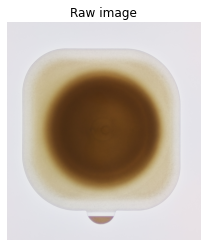

In [7]:
IMG_NR = 0 

raw = cv2.imread(PATH_TO_TEST_IMAGES+dir_list[IMG_NR])
raw = cv2.cvtColor(raw,cv2.COLOR_BGR2RGB)

show_image(raw,"Raw image")

# Edge Detection

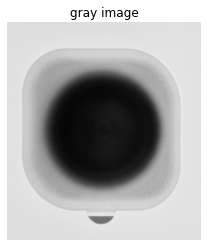

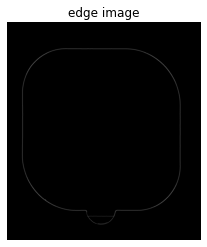

In [8]:
# copy image
image = np.copy(raw) # ROI image
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
norm_img = np.zeros((800,800))
# normalize
gray = cv2.normalize(gray,norm_img,0,255,cv2.NORM_MINMAX)
blur = cv2.GaussianBlur(gray, (5, 5),
                    cv2.BORDER_DEFAULT)              
canny = cv2.Canny(blur,10,100,apertureSize = 3)
# see the gray normalized image
show_image(gray,"gray image")
# see the edge image
show_image(canny,"edge image")

# Make the edges bold

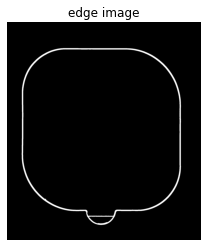

In [9]:
image = np.copy(canny) # ROI image
# errode / dialate
kernel1 = np.ones((10, 10), 'uint8')
kernel2 = np.ones((5, 5), 'uint8')
dilate_img = cv2.dilate(image, kernel1, iterations=1)
erode_img = cv2.erode(dilate_img, kernel2, iterations=2)
ret,erode_img= cv2.threshold(erode_img,100,255,cv2.THRESH_BINARY)
# should show the edge product ROI
show_image(dilate_img,"edge image")

# Find the outline

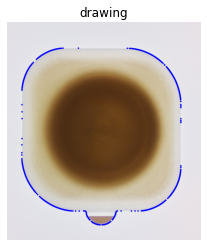

In [18]:
#  image
image = np.copy(dilate_img) # bold edge image
drawing = np.copy(raw) # raw image
cnts = cv2.findContours(image, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]        
###based on example from  http://www.pyimagesearch.com/2015/09/14/ball-tracking-with-opencv
BLUE_COLOR = (0,0,255)
THICKNESS = 15
if len(cnts) > 0:
    c = max(cnts, key=cv2.contourArea)
    cv2.drawContours(drawing, c, -1, BLUE_COLOR, THICKNESS)
# should show the edge product ROI
show_image(drawing,"drawing")
save_file(drawing)